# Environment

In [1]:
import pandas as pd
import numpy as np
from intervaltree import IntervalTree
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple
import os

# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

import importlib
import functions
importlib.reload(functions)
from functions import *

Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords


In [2]:
# Example usage
peaks_file = "./DATA/Peak.csv"
dexseq_file = "./output_v38/dexseq_results_PW1_vs_combined_controls.csv"
output_prefix = "./output_v38/overlap_analysis"

# Load and process data

In [3]:
# Load and process data
peaks_df, dexseq_df = load_and_process_data(peaks_file, dexseq_file)

In [4]:
pd.set_option('display.max_columns', None)
peaks_df.head()

,Row.names,seqnames,start,end,width,annotation,geneChr,geneStart,geneEnd,geneLength,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME,ASE1,ASE2,GeneID,Ctrl.bam,V5.bam,difference,FC,L2FC
0,chr15:25051475-25051745,chr15,25051475.0,25051745.0,271.0,Promoter (<=1kb),15.0,25051477.0,25051571.0,95.0,100033413.0,ENST00000384335.1,0.0,ENSG00000207063,SNORD116-1,"small nucleolar RNA, C/D box 116-1",NaN,NaN,controlledV5_peak_329,0,961,961,961.0,9.908392621
1,chr2:74154059-74154316,chr2,74154059.0,74154316.0,258.0,3' UTR,2.0,74148079.0,74151952.0,3874.0,100507171.0,ENST00000656407.1,5980.0,ENSG00000225439,BOLA3-DT,BOLA3 divergent transcript,NaN,NaN,controlledV5_peak_575,0,31,31,31.0,4.95419631
2,chr17:21198291-21198758,chr17,21198291.0,21198758.0,468.0,3' UTR,17.0,21184385.0,21193265.0,8881.0,25979.0,ENST00000581463.1,13906.0,ENSG00000109016,DHRS7B,dehydrogenase/reductase 7B,NaN,NaN,controlledV5_peak_423,0,20,20,20.0,4.321928095
3,chr17:744815-745029,chr17,744815.0,745029.0,215.0,3' UTR,17.0,747844.0,752038.0,4195.0,50628.0,ENST00000574958.1,7009.0,ENSG00000179409,GEMIN4,gem nuclear organelle associated protein 4,NaN,NaN,controlledV5_peak_403,0,18,18,18.0,4.169925001
4,chr10:27134830-27135032,chr10,27134830.0,27135032.0,203.0,Promoter (1-2kb),10.0,27123547.0,27136337.0,12791.0,10730.0,ENST00000463270.1,1305.0,ENSG00000136758,YME1L1,YME1 like 1 ATPase,NaN,NaN,controlledV5_peak_142,0,17,17,17.0,4.087462841


In [5]:
peaks_df = peaks_df.rename(columns={"Row.names": "peak_name"})

In [6]:
print(list(peaks_df['seqnames'][:5]))
print(list(peaks_df.iloc[:5].index))

['chr15', 'chr2', 'chr17', 'chr17', 'chr10']
[0, 1, 2, 3, 4]


In [7]:
dexseq_df.head()

,Unnamed: 0,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
0,ENSG00000000003.15:E001,ENSG00000000003.15,E001,9.064419,0.016163,3928.904378,0.000000e+00,0.000000e+00,5.931265,5.009454,-0.513830,chrX,100627108,100627108,1,-,10,12,6,2,10,8,12,10,14
1,ENSG00000000003.15:E002,ENSG00000000003.15,E002,1364.225638,0.007380,465.843450,6.972364e-102,8.791361e-102,31.857029,31.513293,-0.075000,chrX,100627109,100629986,2878,-,1106,1345,750,970,1266,1057,1521,2781,2375
2,ENSG00000000003.15:E003,ENSG00000000003.15,E003,443.805530,0.009201,1962.650578,0.000000e+00,0.000000e+00,24.503872,24.252599,-0.056804,chrX,100630759,100630866,108,-,375,434,254,277,397,359,471,926,802
3,ENSG00000000003.15:E004,ENSG00000000003.15,E004,1.978581,0.020921,3476.876104,0.000000e+00,0.000000e+00,2.634388,2.801898,0.180282,chrX,100632063,100632068,6,-,1,2,1,1,4,0,2,5,4
4,ENSG00000000003.15:E005,ENSG00000000003.15,E005,330.134019,0.007735,2830.512068,0.000000e+00,0.000000e+00,22.609421,22.418042,-0.044010,chrX,100632485,100632540,56,-,269,321,184,215,299,267,354,675,613


In [8]:
dexseq_df = dexseq_df.rename(columns={"Unnamed: 0": "dexseq_name"})

In [9]:
dexseq_df.columns

Index(['dexseq_name', 'groupID', 'featureID', 'exonBaseMean', 'dispersion',
       'stat', 'pvalue', 'padj', 'control', 'treated',
       'log2fold_treated_control', 'genomicData.seqnames', 'genomicData.start',
       'genomicData.end', 'genomicData.width', 'genomicData.strand',
       'countData.EDO_1', 'countData.EDO_2', 'countData.EDO_3',
       'countData.ND1_1', 'countData.ND1_2', 'countData.ND1_3',
       'countData.PW1_1', 'countData.PW1_2', 'countData.PW1_3'],
      dtype='object')

In [10]:
print(list(dexseq_df['genomicData.seqnames'][:5]))
print(list(dexseq_df['featureID'][:5]))


['chrX', 'chrX', 'chrX', 'chrX', 'chrX']
['E001', 'E002', 'E003', 'E004', 'E005']


In [11]:
# Create interval tree for efficient overlap detection
peaks_tree = create_interval_tree(peaks_df)

In [12]:
list(peaks_tree.items())[:10]



[Interval(44065741.0, 44065975.0, {'seqnames': 'chr2', 'peak_id': 691, 'peak_name': 'chr2:44065741-44065975'}),
 Interval(2431546.0, 2431734.0, {'seqnames': 'chr19', 'peak_id': 619, 'peak_name': 'chr19:2431546-2431734'}),
 Interval(75321808.0, 75322308.0, {'seqnames': 'chr15', 'peak_id': 1085, 'peak_name': 'chr15:75321808-75322308'}),
 Interval(253490.0, 253707.0, {'seqnames': 'chr10', 'peak_id': 37, 'peak_name': 'chr10:253490-253707'}),
 Interval(47783878.0, 47784227.0, {'seqnames': 'chr12', 'peak_id': 389, 'peak_name': 'chr12:47783878-47784227'}),
 Interval(41604043.0, 41604252.0, {'seqnames': 'chr22', 'peak_id': 785, 'peak_name': 'chr22:41604043-41604252'}),
 Interval(1787781.0, 1788035.0, {'seqnames': 'chr16', 'peak_id': 718, 'peak_name': 'chr16:1787781-1788035'}),
 Interval(19378387.0, 19378889.0, {'seqnames': 'chr9', 'peak_id': 1063, 'peak_name': 'chr9:19378387-19378889'}),
 Interval(37925659.0, 37925853.0, {'seqnames': 'chr22', 'peak_id': 449, 'peak_name': 'chr22:37925659-379258

In [13]:
# Find overlaps
overlaps = find_overlaps(dexseq_df, peaks_tree)
overlaps_df = pd.DataFrame(overlaps)

In [14]:
overlaps_df.head()

,exon_id,peak_id,peak_name,dexseq_name,chromosome,overlap_start,overlap_end,overlap_length,exon_log2fc,exon_padj
0,E014,474,chr17:47132254-47132464,ENSG00000004897.12:E014,chr17,47132257.0,47132374.0,117.0,-0.104318,0.000000e+00
1,E003,40,chr16:57428714-57428958,ENSG00000005194.15:E003,chr16,57428714.0,57428937.0,223.0,-0.222241,0.000000e+00
2,E004,40,chr16:57428714-57428958,ENSG00000005194.15:E004,chr16,57428938.0,57428958.0,20.0,-0.263524,0.000000e+00
3,E014,160,chr7:107160282-107160602,ENSG00000005249.13:E014,chr7,107160282.0,107160602.0,320.0,-0.137301,1.030564e-21
4,E067,395,chr16:3850321-3850506,ENSG00000005339.15:E067,chr16,3850322.0,3850506.0,184.0,0.065804,3.074697e-276


In [15]:
overlaps_df.shape

(1784, 10)

In [16]:
# Save overlaps to file
overlaps_df.to_csv(f"{output_prefix}_overlaps.csv", index=False)

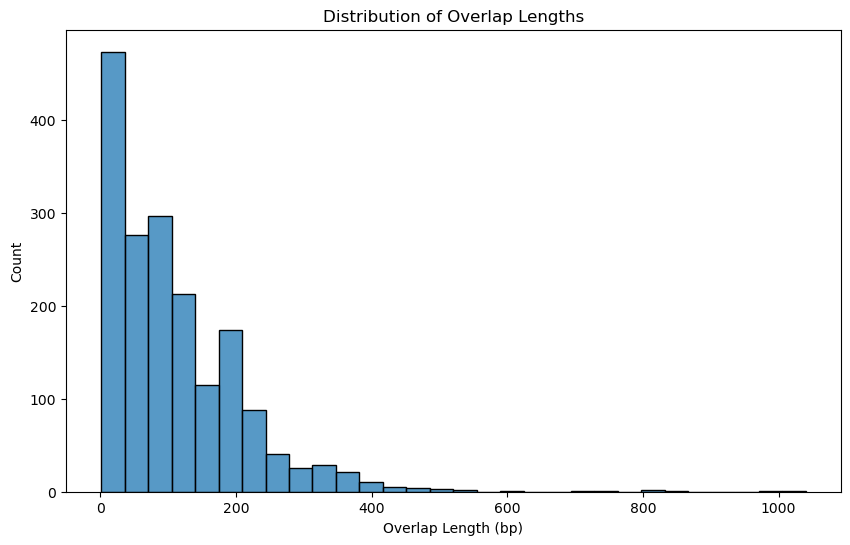

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_overlap_lengths(overlaps_df, ax)


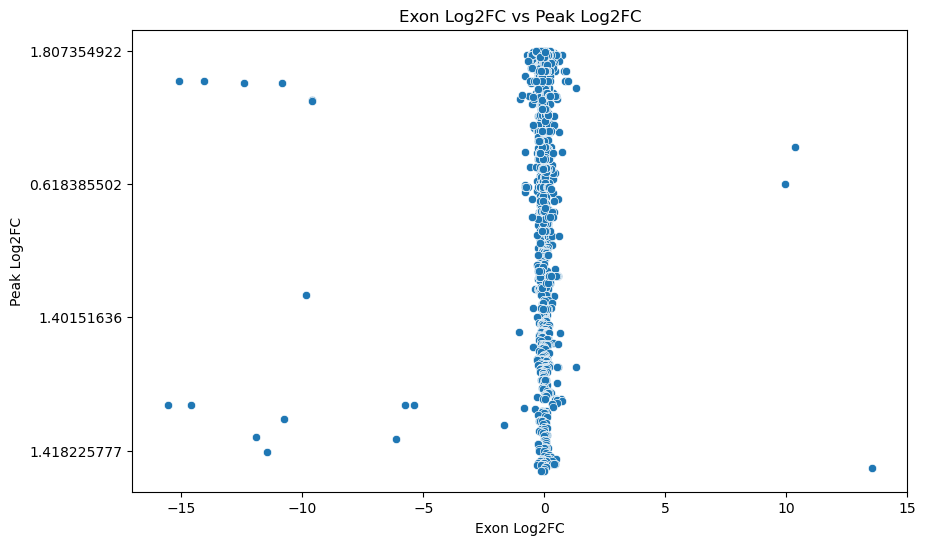

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_fc_correlation(overlaps_df, peaks_df, ax)

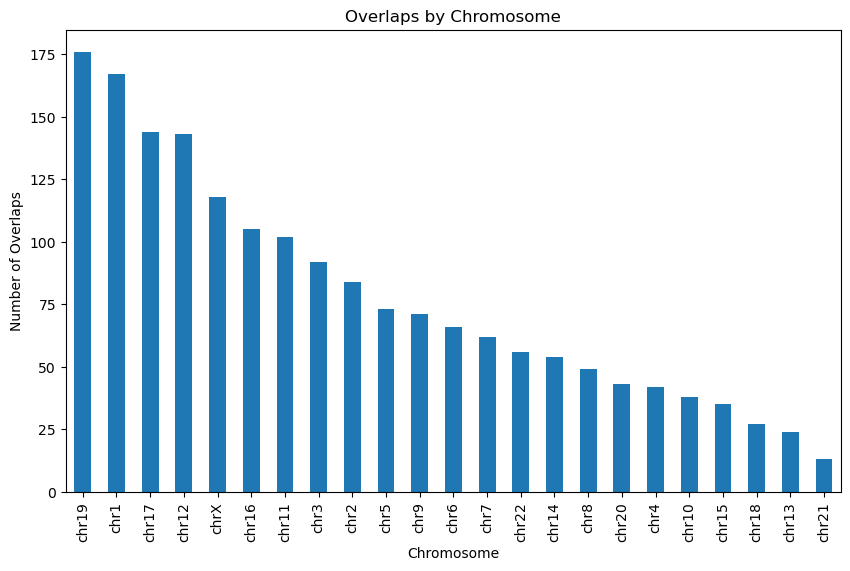

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_chromosome_distribution(overlaps_df, ax)

In [20]:
total_peaks = len(peaks_df)
total_exons = len(dexseq_df)
peaks_with_overlaps = len(overlaps_df['peak_id'].unique())
exons_with_overlaps = len(overlaps_df['exon_id'].unique())

print(f"Total Peaks: {total_peaks}")
print(f"Total Diff. Expressed Exons: {total_exons}")
print(f"Peaks with Overlaps: {peaks_with_overlaps}")
print(f"Exons with Overlaps: {exons_with_overlaps}")
print(f"Total Overlap Events: {len(overlaps_df)}")

Total Peaks: 1136
Total Diff. Expressed Exons: 519126
Peaks with Overlaps: 808
Exons with Overlaps: 138
Total Overlap Events: 1784


In [21]:
# # Find overlaps and distances
overlaps = find_overlaps2(dexseq_df, peaks_tree)
overlaps_df = pd.DataFrame(overlaps)

In [22]:
overlaps_df.head()

,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj
0,E001,641,chr2:37222376-37222562,ENSG00000003509.16:E001,chr2,-9175.0,0.0,0.444977,0.0
1,E002,641,chr2:37222376-37222562,ENSG00000003509.16:E002,chr2,-9191.0,0.0,-0.146748,0.0
2,E003,641,chr2:37222376-37222562,ENSG00000003509.16:E003,chr2,-9201.5,0.0,-0.019952,0.0
3,E004,641,chr2:37222376-37222562,ENSG00000003509.16:E004,chr2,-9214.5,0.0,0.129825,0.0
4,E005,641,chr2:37222376-37222562,ENSG00000003509.16:E005,chr2,-9255.5,0.0,0.115130,0.0


In [23]:
dexseq_df.head()

,dexseq_name,groupID,featureID,exonBaseMean,dispersion,stat,pvalue,padj,control,treated,log2fold_treated_control,genomicData.seqnames,genomicData.start,genomicData.end,genomicData.width,genomicData.strand,countData.EDO_1,countData.EDO_2,countData.EDO_3,countData.ND1_1,countData.ND1_2,countData.ND1_3,countData.PW1_1,countData.PW1_2,countData.PW1_3
0,ENSG00000000003.15:E001,ENSG00000000003.15,E001,9.064419,0.016163,3928.904378,0.000000e+00,0.000000e+00,5.931265,5.009454,-0.513830,chrX,100627108,100627108,1,-,10,12,6,2,10,8,12,10,14
1,ENSG00000000003.15:E002,ENSG00000000003.15,E002,1364.225638,0.007380,465.843450,6.972364e-102,8.791361e-102,31.857029,31.513293,-0.075000,chrX,100627109,100629986,2878,-,1106,1345,750,970,1266,1057,1521,2781,2375
2,ENSG00000000003.15:E003,ENSG00000000003.15,E003,443.805530,0.009201,1962.650578,0.000000e+00,0.000000e+00,24.503872,24.252599,-0.056804,chrX,100630759,100630866,108,-,375,434,254,277,397,359,471,926,802
3,ENSG00000000003.15:E004,ENSG00000000003.15,E004,1.978581,0.020921,3476.876104,0.000000e+00,0.000000e+00,2.634388,2.801898,0.180282,chrX,100632063,100632068,6,-,1,2,1,1,4,0,2,5,4
4,ENSG00000000003.15:E005,ENSG00000000003.15,E005,330.134019,0.007735,2830.512068,0.000000e+00,0.000000e+00,22.609421,22.418042,-0.044010,chrX,100632485,100632540,56,-,269,321,184,215,299,267,354,675,613


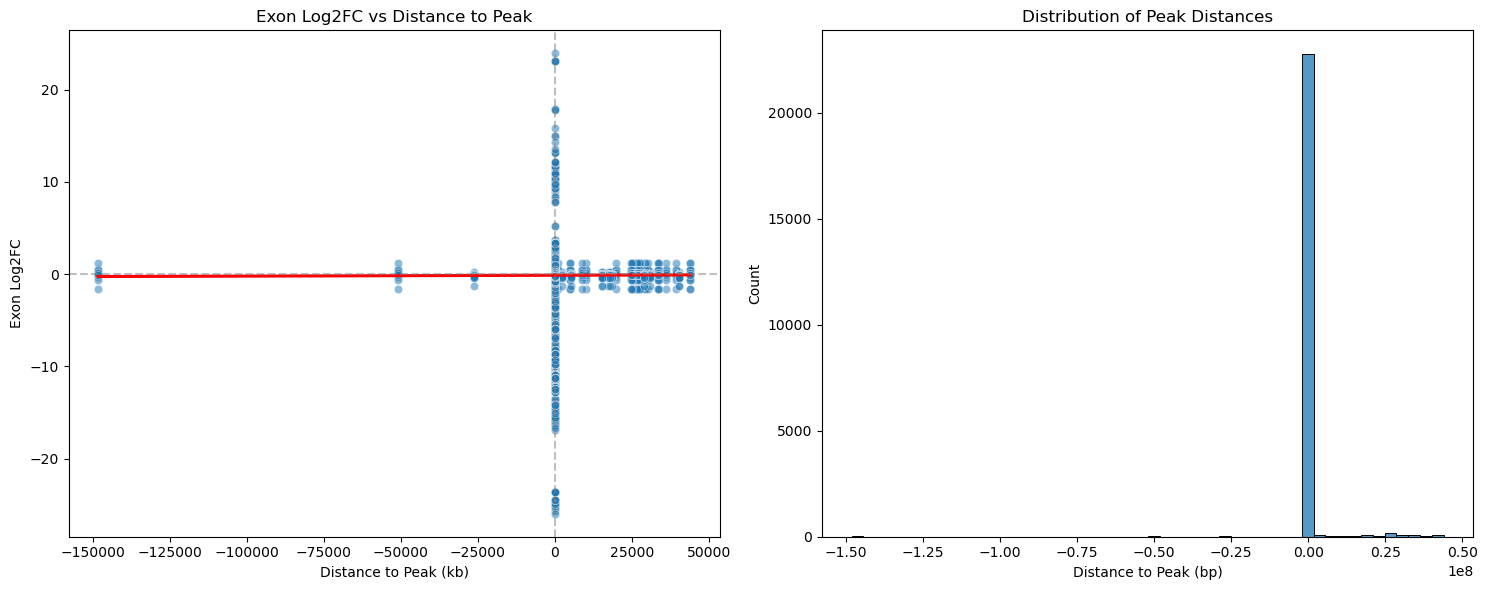

In [24]:
# Create visualization
fig = visualize_distance_analysis(overlaps_df)
plt.show()

# Complementarity analysis

In [25]:
ASE1 = 'AACATTCCTTGGAAAAG'
ASE2 = 'CGTCATTCTCATCGGAA'

cASE1 = 'CTTTTCCAAGGAATGTT'
cASE2 = 'TTCCGATGAGAATGACG'

In [26]:
enriched_overlaps_df3 = analyze_overlaps_with_als_optimized(overlaps_df, dexseq_df)

Starting ALS complementarity analysis...
Using 70 CPU cores for parallel processing
Split data into 283 chunks of approximately 83 rows each
Starting parallel processing...
Completed chunk 16/283
Completed chunk 25/283
Completed chunk 14/283
Completed chunk 1/283
Completed chunk 44/283
Completed chunk 70/283
Completed chunk 3/283
Completed chunk 36/283
Completed chunk 29/283
Completed chunk 61/283
Completed chunk 9/283
Completed chunk 6/283
Completed chunk 21/283
Completed chunk 5/283
Completed chunk 35/283
Completed chunk 45/283
Completed chunk 40/283
Completed chunk 48/283
Completed chunk 31/283
Completed chunk 53/283
Completed chunk 7/283
Completed chunk 27/283
Completed chunk 12/283
Completed chunk 20/283
Completed chunk 52/283
Completed chunk 57/283
Completed chunk 67/283
Completed chunk 55/283
Completed chunk 26/283
Completed chunk 63/283
Completed chunk 39/283
Completed chunk 17/283
Completed chunk 34/283
Completed chunk 47/283
Completed chunk 46/283
Completed chunk 41/283
Compl

In [27]:
# enriched_overlaps_df3 = analyze_overlaps_with_als(overlaps_df, dexseq_df)

# Load the data back

In [ ]:
output_path = "output_v38/enriched_overlaps_with_als.csv"
pickle_path = "output_v38/enriched_overlaps_with_als.pkl"

In [28]:
%%script false --no-raise-error
# Save as pickle (better for preserving data types and complex objects)
enriched_overlaps_df3.to_pickle(pickle_path)

# Save as CSV
enriched_overlaps_df3.to_csv(output_path, index=False)

In [54]:
# Load the data back

# From CSV
# loaded_df_csv = pd.read_csv(output_path)

# From pickle
enriched_overlaps_df3 = pd.read_pickle(pickle_path)

In [56]:
enriched_overlaps_df3.shape

(23462, 22)

In [55]:
enriched_overlaps_df3.head()

,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length
0,E066,538,chr13:98002480-98002811,ENSG00000065150.21:E066,chr13,112.0,111.0,0.051996,5.283841e-306,0.1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E067,352,chr13:98010025-98010233,ENSG00000065150.21:E067,chr13,7491.5,0.0,-0.009710,0.000000e+00,7.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E067,391,chr13:98006155-98006340,ENSG00000065150.21:E067,chr13,3610.0,0.0,-0.009710,0.000000e+00,3.6100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E067,538,chr13:98002480-98002811,ENSG00000065150.21:E067,chr13,8.0,91.0,-0.009710,0.000000e+00,0.0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E068,352,chr13:98010025-98010233,ENSG00000065150.21:E068,chr13,7400.5,0.0,0.029742,0.000000e+00,7.4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


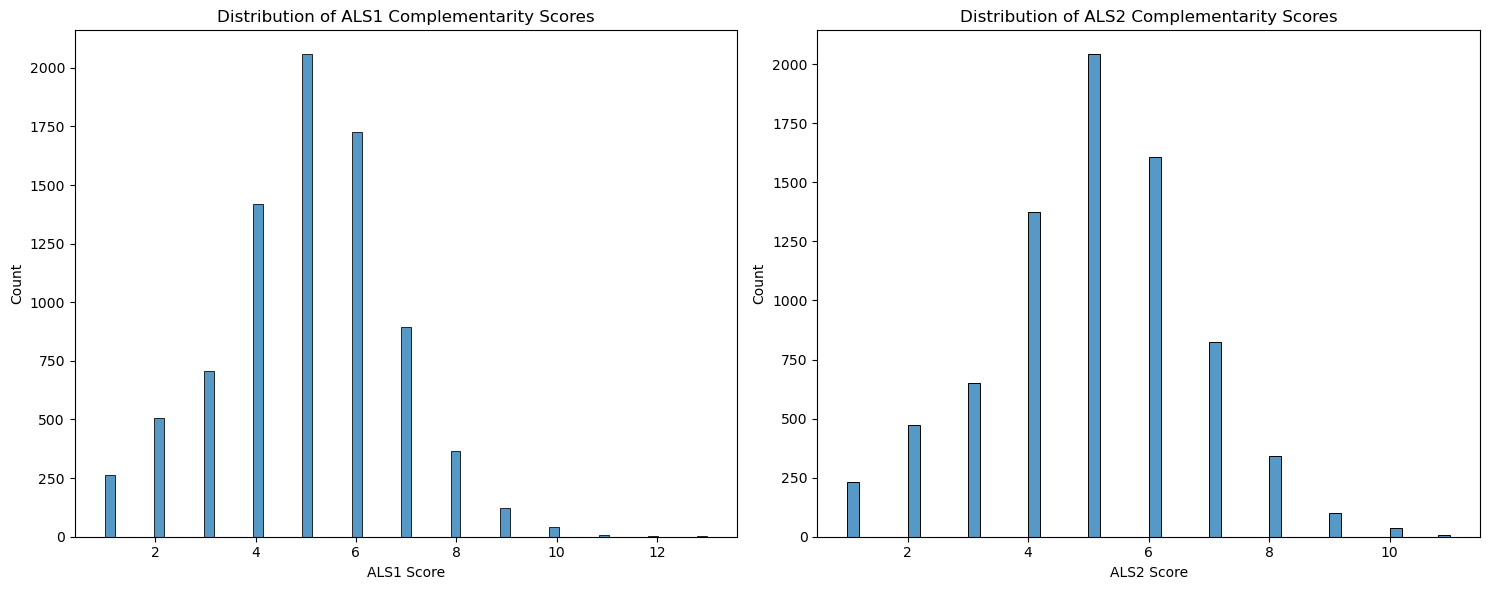

In [58]:
# Visualize ALS scores distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=enriched_overlaps_df3, x='current_exon_als1_score', ax=ax1)
ax1.set_title('Distribution of ALS1 Complementarity Scores')
ax1.set_xlabel('ALS1 Score')

sns.histplot(data=enriched_overlaps_df3, x='next_exon_als1_score', ax=ax2)
ax2.set_title('Distribution of ALS2 Complementarity Scores')
ax2.set_xlabel('ALS2 Score')

plt.tight_layout()
plt.show()

In [59]:
enriched_overlaps_df3["groupID"] = enriched_overlaps_df3["dexseq_name"].str.split(':').str[0]

In [61]:
enriched_overlaps_df3.head()

,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,groupID
0,E066,538,chr13:98002480-98002811,ENSG00000065150.21:E066,chr13,112.0,111.0,0.051996,5.283841e-306,0.1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21
1,E067,352,chr13:98010025-98010233,ENSG00000065150.21:E067,chr13,7491.5,0.0,-0.009710,0.000000e+00,7.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21
2,E067,391,chr13:98006155-98006340,ENSG00000065150.21:E067,chr13,3610.0,0.0,-0.009710,0.000000e+00,3.6100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21
3,E067,538,chr13:98002480-98002811,ENSG00000065150.21:E067,chr13,8.0,91.0,-0.009710,0.000000e+00,0.0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21
4,E068,352,chr13:98010025-98010233,ENSG00000065150.21:E068,chr13,7400.5,0.0,0.029742,0.000000e+00,7.4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21


In [62]:
enriched_overlaps_df3["geneID"] = enriched_overlaps_df3["groupID"].str.split('.').str[0]

In [63]:
enriched_overlaps_df3.head()

,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,groupID,geneID
0,E066,538,chr13:98002480-98002811,ENSG00000065150.21:E066,chr13,112.0,111.0,0.051996,5.283841e-306,0.1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21,ENSG00000065150
1,E067,352,chr13:98010025-98010233,ENSG00000065150.21:E067,chr13,7491.5,0.0,-0.009710,0.000000e+00,7.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21,ENSG00000065150
2,E067,391,chr13:98006155-98006340,ENSG00000065150.21:E067,chr13,3610.0,0.0,-0.009710,0.000000e+00,3.6100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21,ENSG00000065150
3,E067,538,chr13:98002480-98002811,ENSG00000065150.21:E067,chr13,8.0,91.0,-0.009710,0.000000e+00,0.0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21,ENSG00000065150
4,E068,352,chr13:98010025-98010233,ENSG00000065150.21:E068,chr13,7400.5,0.0,0.029742,0.000000e+00,7.4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000065150.21,ENSG00000065150


In [64]:
import mygene

# Initialize mygene client
mg = mygene.MyGeneInfo()

# Remove version numbers from ENSEMBL IDs
sel_genes_no_version = enriched_overlaps_df3["geneID"]

# Query the gene symbols
results = mg.querymany(sel_genes_no_version, scopes='ensembl.gene', fields='symbol', species='human')

1032 input query terms found dup hits:	[('ENSG00000065150', 65), ('ENSG00000065154', 22), ('ENSG00000065183', 23), ('ENSG00000083168', 22),
3 input query terms found no hit:	['ENSG00000269900', 'ENSG00000269900', 'ENSG00000269900']


In [70]:
# Add gene names to enriched_overlaps_df3
enriched_overlaps_df3["gene_name"] = [item.get('symbol', '') for item in results]

In [102]:
enriched_overlaps_df3.head()

,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,groupID,geneID,gene_name,sum_als1_score,sum_als2_score
0,E066,538,chr13:98002480-98002811,ENSG00000065150.21:E066,chr13,112.0,111.0,0.051996,5.283841e-306,0.1120,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,ENSG00000065150.21,ENSG00000065150,IPO5,0.0,0.0
1,E067,352,chr13:98010025-98010233,ENSG00000065150.21:E067,chr13,7491.5,0.0,-0.009710,0.000000e+00,7.4915,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,ENSG00000065150.21,ENSG00000065150,IPO5,0.0,0.0
2,E067,391,chr13:98006155-98006340,ENSG00000065150.21:E067,chr13,3610.0,0.0,-0.009710,0.000000e+00,3.6100,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,ENSG00000065150.21,ENSG00000065150,IPO5,0.0,0.0
3,E067,538,chr13:98002480-98002811,ENSG00000065150.21:E067,chr13,8.0,91.0,-0.009710,0.000000e+00,0.0080,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,ENSG00000065150.21,ENSG00000065150,IPO5,0.0,0.0
4,E068,352,chr13:98010025-98010233,ENSG00000065150.21:E068,chr13,7400.5,0.0,0.029742,0.000000e+00,7.4005,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,ENSG00000065150.21,ENSG00000065150,IPO5,0.0,0.0


In [71]:
enriched_overlaps_df3_backup = enriched_overlaps_df3.copy()

In [101]:
%%script false --no-raise-error
enriched_overlaps_df3 = enriched_overlaps_df3_backup.copy()

In [103]:
enriched_overlaps_df3.loc[enriched_overlaps_df3["current_exon_als1_score"].isna(), "current_exon_als1_score"] = 0
enriched_overlaps_df3.loc[enriched_overlaps_df3["current_exon_als2_score"].isna(), "current_exon_als2_score"] = 0
enriched_overlaps_df3.loc[enriched_overlaps_df3["next_exon_als1_score"].isna(), "next_exon_als1_score"] = 0
enriched_overlaps_df3.loc[enriched_overlaps_df3["next_exon_als2_score"].isna(), "next_exon_als2_score"] = 0
enriched_overlaps_df3.loc[enriched_overlaps_df3["previous_exon_als1_score"].isna(), "previous_exon_als1_score"] = 0
enriched_overlaps_df3.loc[enriched_overlaps_df3["previous_exon_als2_score"].isna(), "previous_exon_als2_score"] = 0

In [104]:
enriched_overlaps_df3["sum_als1_score"] = enriched_overlaps_df3["current_exon_als1_score"] + enriched_overlaps_df3["next_exon_als1_score"] + enriched_overlaps_df3["previous_exon_als1_score"]
enriched_overlaps_df3["sum_als2_score"] = enriched_overlaps_df3["current_exon_als2_score"] + enriched_overlaps_df3["next_exon_als2_score"] + enriched_overlaps_df3["previous_exon_als2_score"]


In [105]:
enriched_overlaps_df3 = enriched_overlaps_df3[(enriched_overlaps_df3["sum_als1_score"] > 0) | (enriched_overlaps_df3["sum_als2_score"] > 0)]

In [106]:
enriched_overlaps_df3.shape

(10298, 27)

In [107]:
enriched_overlaps_df3.sort_values(by="sum_als1_score", ascending=False, inplace=True)

In [114]:
enriched_overlaps_df3.shape

(10298, 27)

In [115]:
enriched_overlaps_df3.head()

,exon_id,peak_id,peak_name,dexseq_name,chromosome,distance_to_peak,overlap_length,exon_log2fc,exon_padj,distance_kb,current_exon_id,current_exon_als1_score,current_exon_als2_score,current_exon_sequence_length,next_exon_id,next_exon_als1_score,next_exon_als2_score,next_exon_sequence_length,previous_exon_id,previous_exon_als1_score,previous_exon_als2_score,previous_exon_sequence_length,groupID,geneID,gene_name,sum_als1_score,sum_als2_score
2277,E031,603,chr10:5746310-5746538,ENSG00000108021.20:E031,chr10,4112.5,0.0,-0.025561,0.000000e+00,4.1125,E031,8.0,6.0,430.0,E032,9.0,8.0,3849.0,E030,11.0,6.0,684.0,ENSG00000108021.20,ENSG00000108021,TASOR2,28.0,20.0
2230,E002,622,chr3:149739286-149739508,ENSG00000114744.9:E002,chr3,-2010.5,0.0,0.111998,0.000000e+00,-2.0105,E002,6.0,4.0,36.0,E003,7.0,5.0,149.0,E001,13.0,7.0,2918.0,ENSG00000114744.9,ENSG00000114744,COMMD2,26.0,16.0
9986,E003,680,chrX:108733099-108733294,ENSG00000133124.12:E003,chrX,5645.5,0.0,-0.060474,1.199368e-08,5.6455,E003,9.0,8.0,10055.0,E004,8.0,9.0,3831.0,E002,9.0,7.0,2575.0,ENSG00000133124.12,ENSG00000133124,IRS4,26.0,24.0
4137,E057,353,chr14:64025127-64025314,ENSG00000054654.19:E057,chr14,-5966.0,0.0,-0.148415,0.000000e+00,-5.9660,E057,8.0,7.0,342.0,E058,7.0,7.0,99.0,E056,11.0,6.0,165.0,ENSG00000054654.19,ENSG00000054654,SYNE2,26.0,20.0
455,E003,227,chr2:216190222-216190431,ENSG00000115942.9:E003,chr2,15276972.5,0.0,-0.026311,0.000000e+00,15276.9725,E003,7.0,5.0,119.0,E004,6.0,6.0,517.0,E002,12.0,6.0,934.0,ENSG00000115942.9,ENSG00000115942,ORC2,25.0,17.0


In [116]:
enriched_overlaps_df3.shape

(10298, 27)

In [111]:
enriched_overlaps_df3.to_excel('enriched_overlaps_df3_with_sum_scores.xlsx', index=False)

In [120]:
visualize_top_alignments(enriched_overlaps_df3)

Top 5 alignments by ALS1 score:

Gene: TASOR2 (ENSG00000108021)
Exon: E031
Peak: chr10:5746310-5746538
ALS1 Scores:
  Previous exon: 11.0
  Current exon:  8.0
  Next exon:     9.0
  Total:         28.0
ALS2 Scores:
  Previous exon: 6.0
  Current exon:  6.0
  Next exon:     8.0
  Total:         20.0
Distance to peak: 4.11 kb
Log2 fold change: -0.026
--------------------------------------------------

Gene: COMMD2 (ENSG00000114744)
Exon: E002
Peak: chr3:149739286-149739508
ALS1 Scores:
  Previous exon: 13.0
  Current exon:  6.0
  Next exon:     7.0
  Total:         26.0
ALS2 Scores:
  Previous exon: 7.0
  Current exon:  4.0
  Next exon:     5.0
  Total:         16.0
Distance to peak: -2.01 kb
Log2 fold change: 0.112
--------------------------------------------------

Gene: IRS4 (ENSG00000133124)
Exon: E003
Peak: chrX:108733099-108733294
ALS1 Scores:
  Previous exon: 9.0
  Current exon:  9.0
  Next exon:     8.0
  Total:         26.0
ALS2 Scores:
  Previous exon: 7.0
  Current exon:  8.0
